# 3. Exploring a dictionary-based approach with Empath

Empath (see [Fast et al., 2016](https://dl.acm.org/doi/10.1145/2858036.2858535)) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine.

Empath does not come pre-installed with standard python distributions so you would need to install it on your system using the following command in your terminal:

````
pip install empath
````

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from empath import Empath
lexicon = Empath()

In [2]:
with open('./data/carroll-alice.txt', 'r', encoding='utf-8-sig') as fo :
    alice = fo.readlines()

alice=alice[28:]
alice = [text.replace('\n', '') for text in alice]
alice = [text for text in alice if len(text) > 0]

## Get the list of categories from Empath
Empath has a set of predefined categories. To create a new category of your own, use the following command.

In [3]:
lexicon.cats.keys()

dict_keys(['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic

To analyze a piece of text using this category, use the following function.

<Axes: >

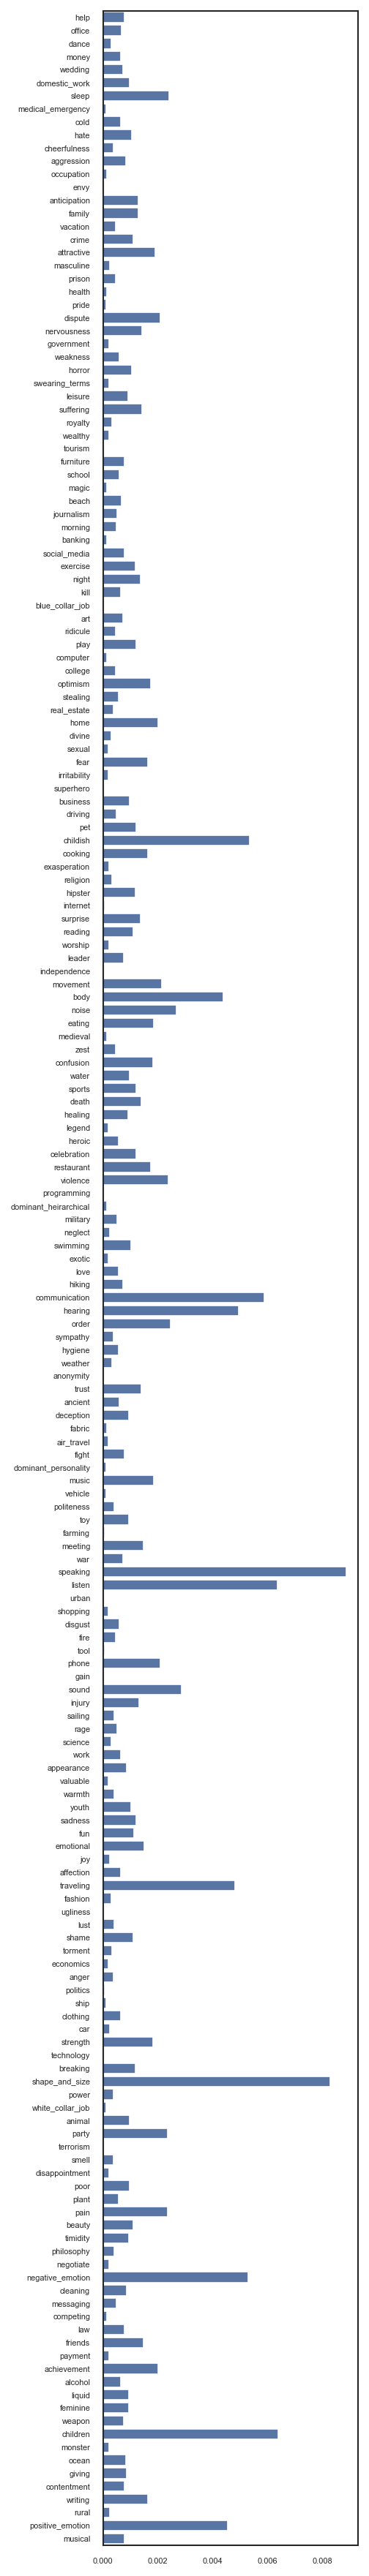

In [4]:
alice_text = ' '.join(alice)
results = lexicon.analyze(alice_text, normalize=True)
sns.set_theme('paper', font_scale=0.6)
sns.set_style('white')
plt.figure(figsize=(3,30), dpi=150)
# sns.barplot(results, orient='h')

## Analysing a piece of text using Empath


Let's first create a dataframe so we can add any computed metrics alongside each unit of text, like paragraphs

In [5]:
alice_df = pd.DataFrame({'text' : alice})
alice_df[0:10]

,text
0,Alice was beginning to get very tired of sitti...
1,"bank, and of having nothing to do: once or twi..."
2,"the book her sister was reading, but it had no..."
3,"conversations in it, “and what is the use of a..."
4,“without pictures or conversations?”
5,So she was considering in her own mind (as wel...
6,"hot day made her feel very sleepy and stupid),..."
7,making a daisy-chain would be worth the troubl...
8,"picking the daisies, when suddenly a White Rab..."
9,close by her.


We can create a function for this approach so that we can pass this function to the dataframe.

In [6]:
def calc_childish(text):
    category = 'childish'
    score = lexicon.analyze(text, categories=[category], normalize=False)
    # print(score)
    return score[category]

alice_df['childish'] = alice_df['text'].apply(calc_childish)
                                                                
alice_df.sample(5)                                                                               

,text,childish
1472,"their faces, and the pattern on their backs wa...",0.0
5,So she was considering in her own mind (as wel...,0.0
1370,"“But they were _in_ the well,” Alice said to t...",0.0
255,"no toys to play with, and oh! ever so many les...",0.0
2108,"to put down yet, before the trial’s begun.”",0.0


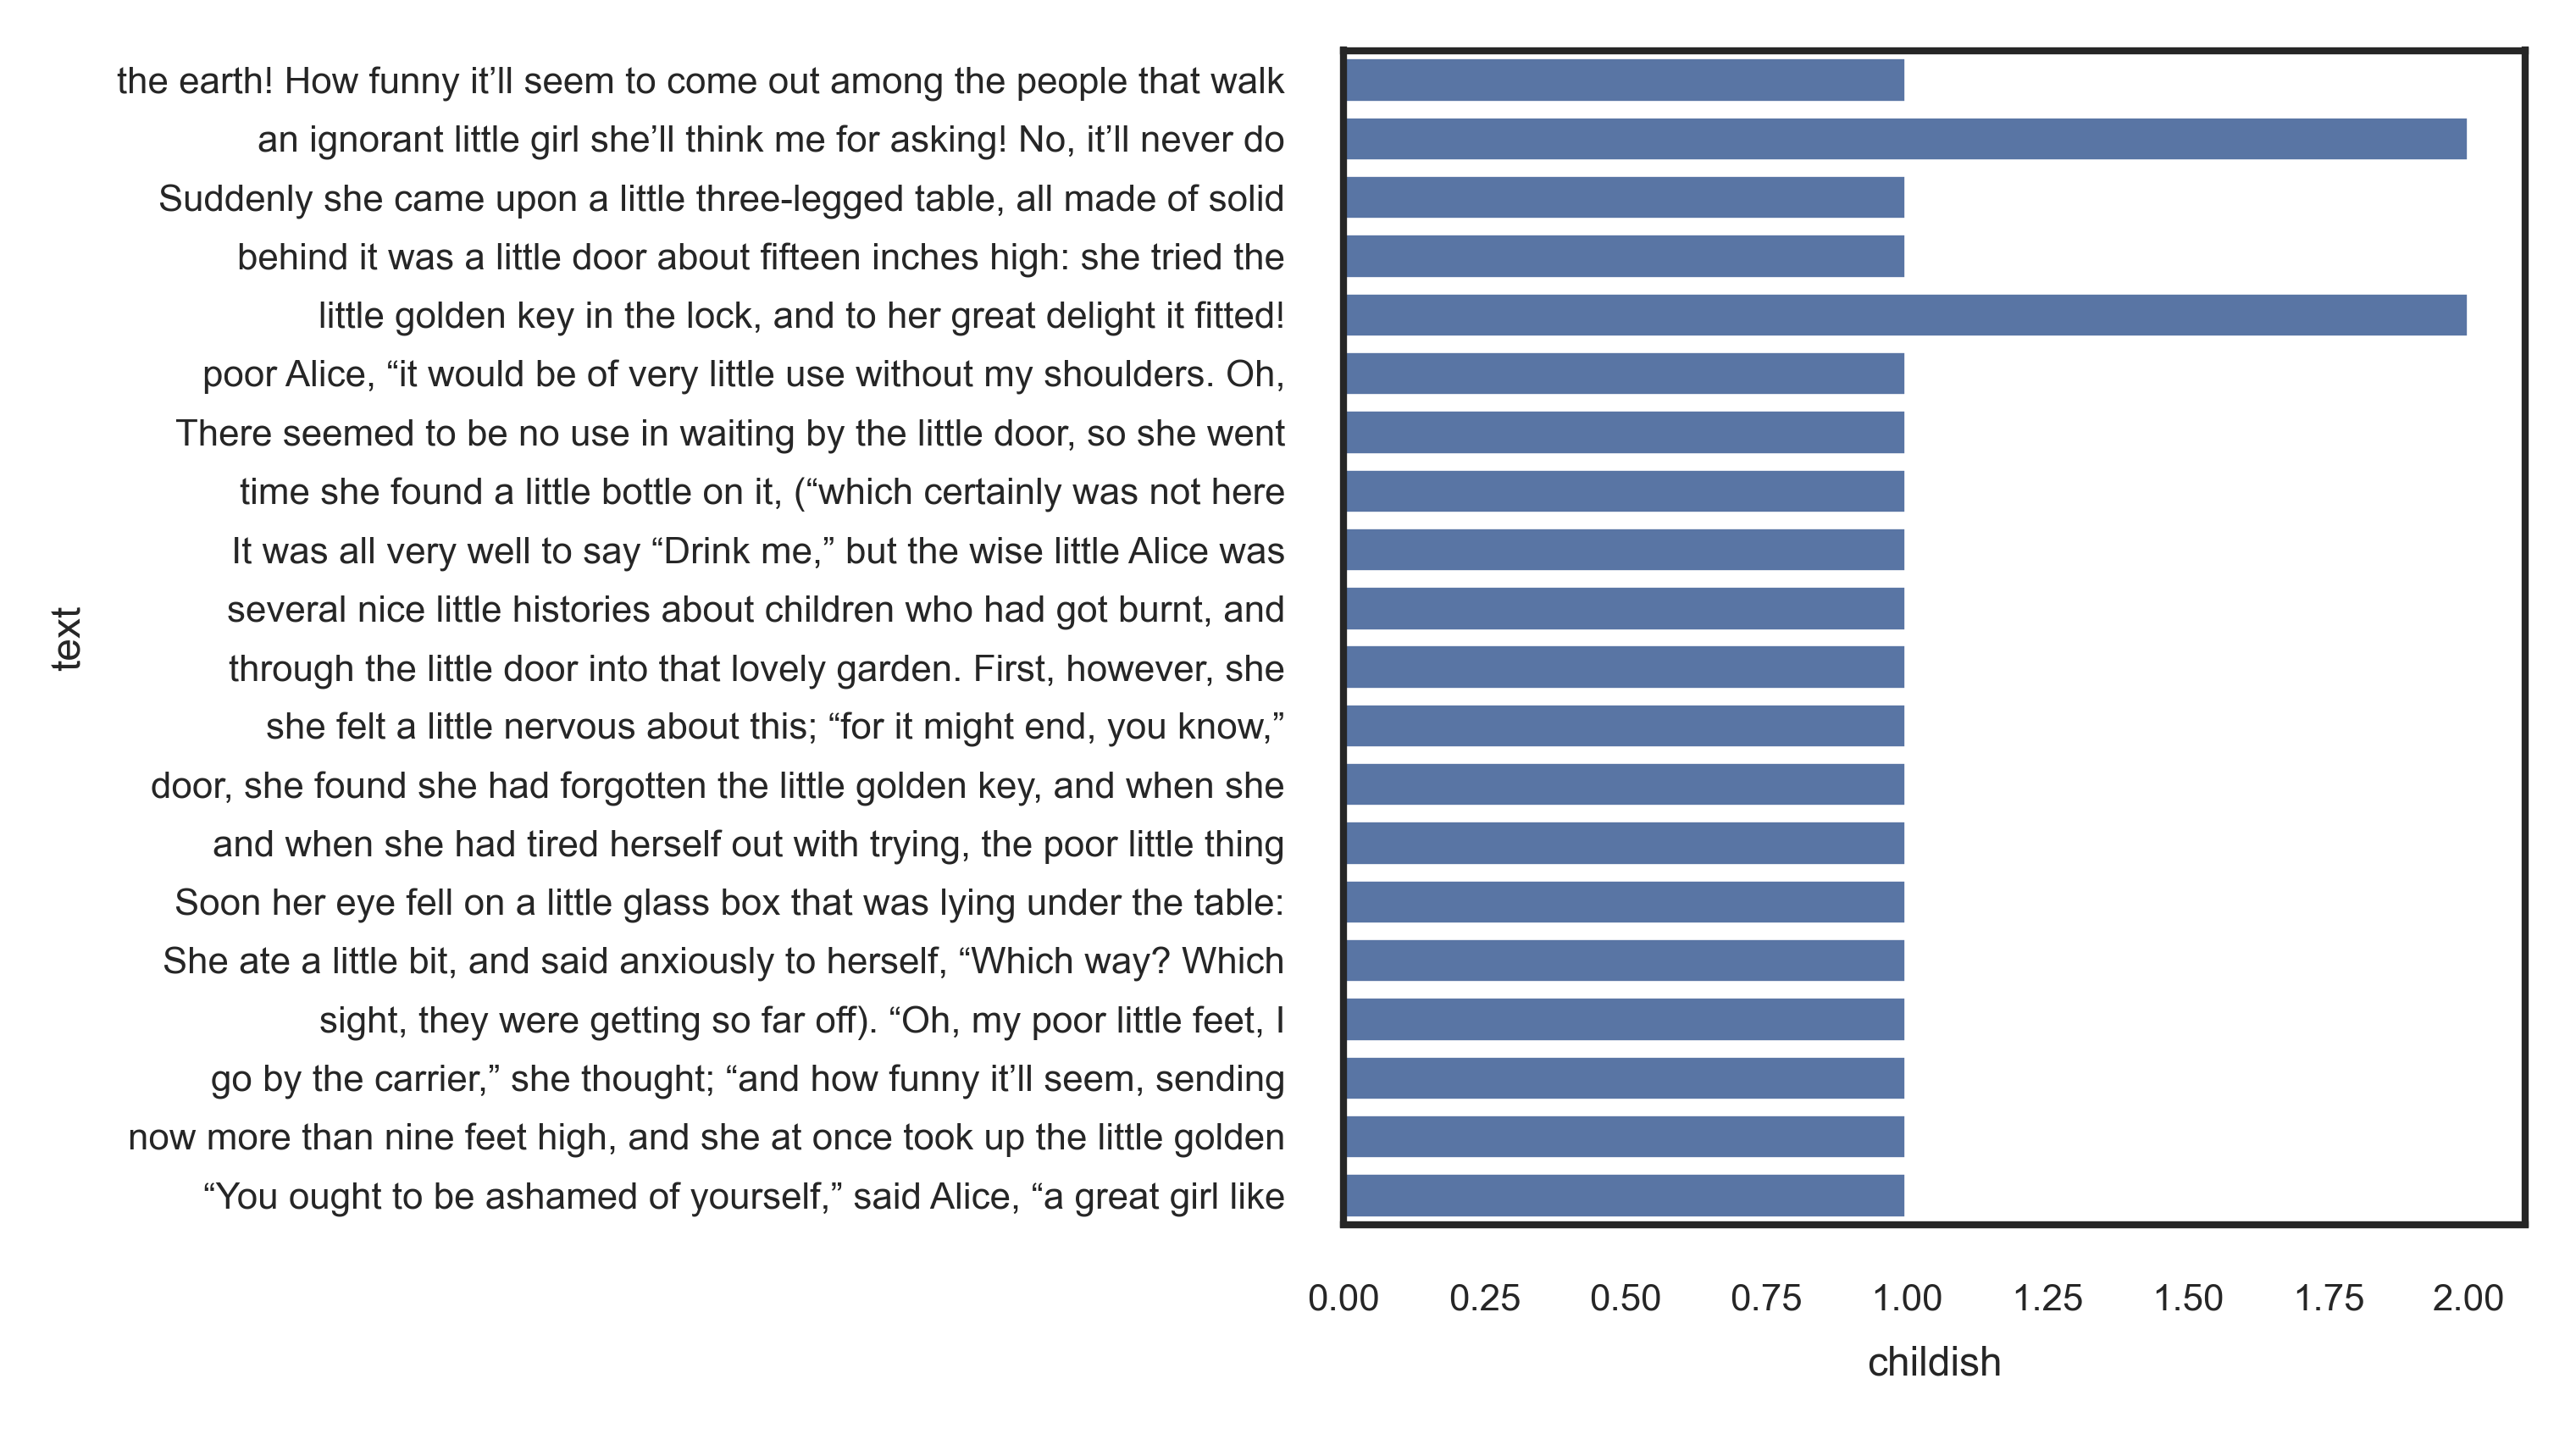

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3),dpi=600)
childish_text_df = alice_df[alice_df['childish'] > 0]
g = sns.barplot(data = childish_text_df[0:20], x='childish', y='text')
# g = g.set_yticklabels([])


## A similar approach for sentiment analysis

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
def sentiment(text) :
    vs = analyzer.polarity_scores(text)['compound']
    return vs

In [10]:
alice_df['sentiment'] = alice_df['text'].apply(sentiment)
alice_df.sample(3)

,text,childish,sentiment
1369,think you could draw treacle out of a treacle-...,0.0,0.0000
704,"all the while, till at last it sat down a good...",0.0,0.4404
2346,The White Rabbit put on his spectacles. “Where...,0.0,0.3182


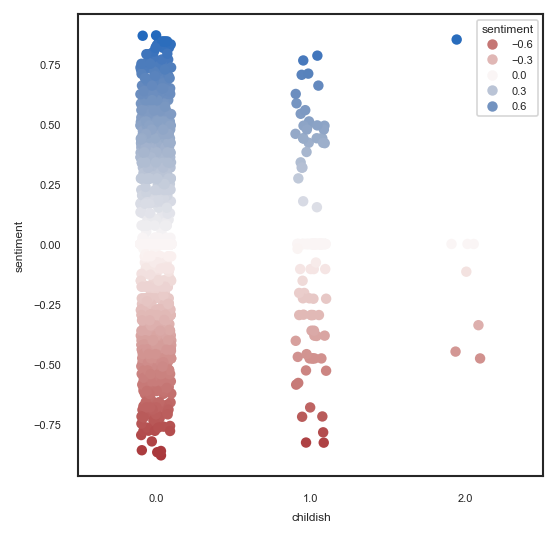

In [11]:
plt.figure(figsize=(4,4),dpi=150)
g = sns.stripplot(data=alice_df, x="childish", y="sentiment", hue='sentiment', palette=sns.color_palette("vlag_r", as_cmap=True))

<Axes: xlabel='sentiment', ylabel='text'>

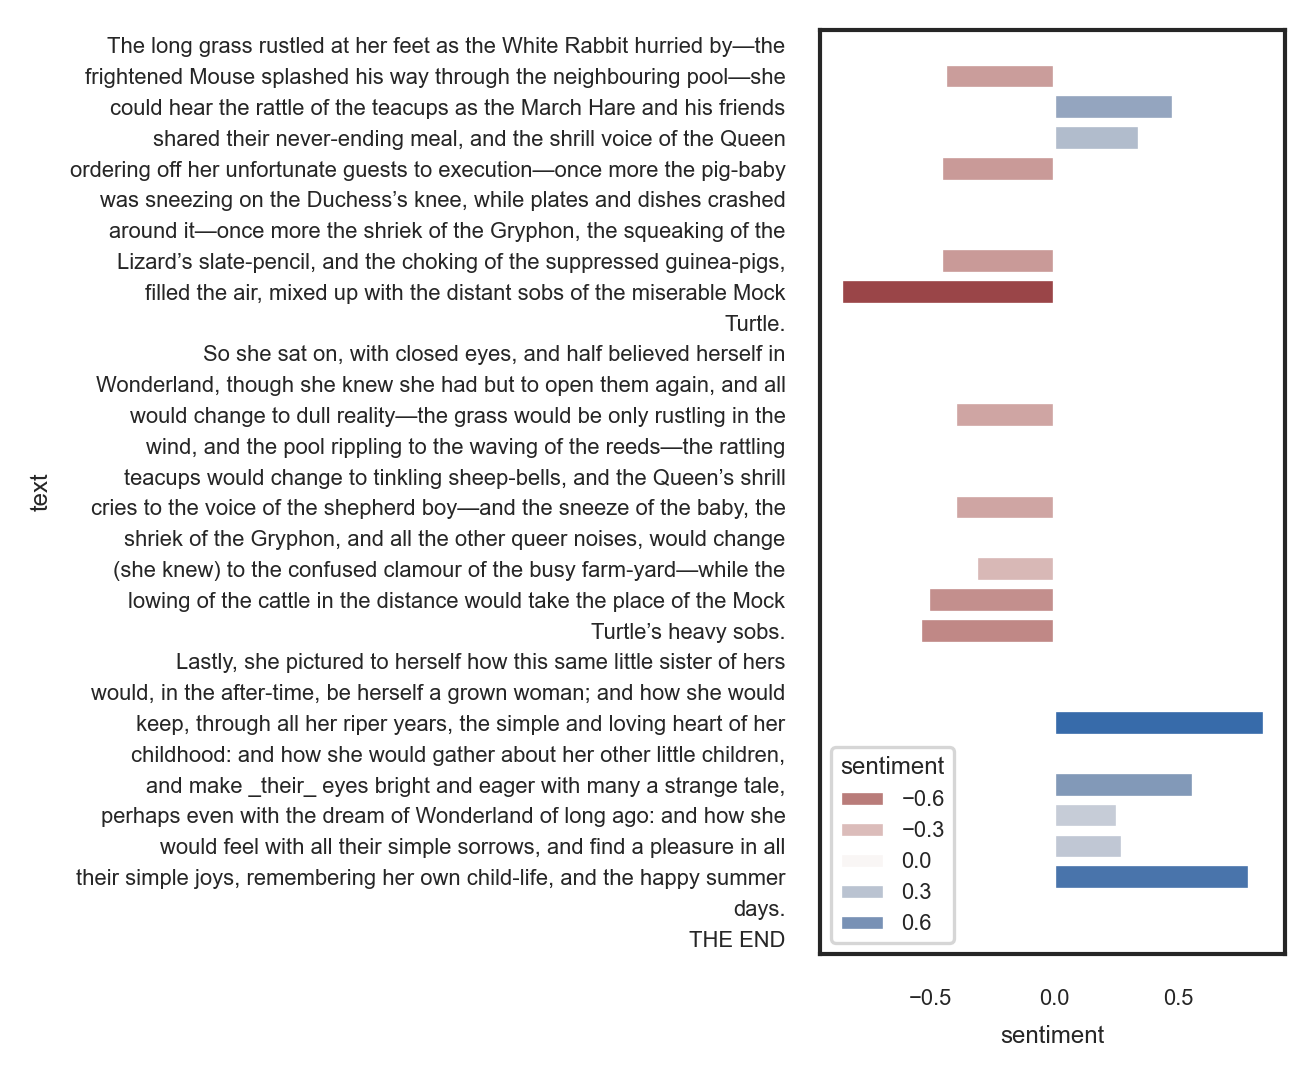

In [12]:
plt.figure(figsize=(2,4), dpi=300)
sns.barplot(data=alice_df[-30:], x='sentiment', y='text',hue='sentiment', palette=sns.color_palette("vlag_r", as_cmap=True))
# plt.axis('off')